In [140]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


file_name = "Energy_feature.csv"
file_name2 = "Valence_feature.csv"

In [141]:
df = pd.read_csv(file_name,index_col = 0)
df

,danceability,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,energy
0,0.7420,0.00756,0.000002,0.1240,-5.819,0.3690,125.044,0.93600
1,0.0925,0.99200,0.762000,0.3330,-26.473,0.0439,87.431,0.00555
2,0.1710,0.90400,0.957000,0.0910,-22.603,0.0397,75.733,0.05640
3,0.1620,0.99000,0.804000,0.0826,-29.768,0.0470,131.477,0.04120
4,0.3340,0.97400,0.878000,0.1090,-24.384,0.0407,119.510,0.08730
...,...,...,...,...,...,...,...,...
9716,0.5040,0.35800,0.000104,0.4000,-5.170,0.0482,167.852,0.98500
9717,0.5760,0.09580,0.125000,0.3620,-6.494,0.0710,119.400,0.96500
9718,0.5390,0.12000,0.000092,0.1190,-4.388,0.0805,112.831,0.94800
9719,0.6710,0.02660,0.000209,0.0951,-3.868,0.0564,163.945,0.92700


In [213]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20,random_state=100)
x_train = train[['danceability', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
x_test = test[['danceability', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
#y_train = train["valence"]
y_train = train["energy"]
#y_test = test["valence"]
y_test = test["energy"]

x_all = df[['danceability', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
y_all = df["energy"]

In [148]:



#################################################################################################################################################

#ランダムフォレスト



In [214]:
from sklearn.ensemble import RandomForestRegressor#　 アルゴリズムRandomForestRegressorを使えるようにする。

rfr = RandomForestRegressor(n_jobs= -1)#               アルゴリズムの選択。（n_jobs = -1でCPUの最大コア数-1個使う）
rfr.fit(x_train, y_train)#　　　　　　　　　　　　　　   学習。
y_pred_rfr = rfr.predict(x_test)# 予測。

y_pred_rfr_Eall = rfr.predict(x_all)

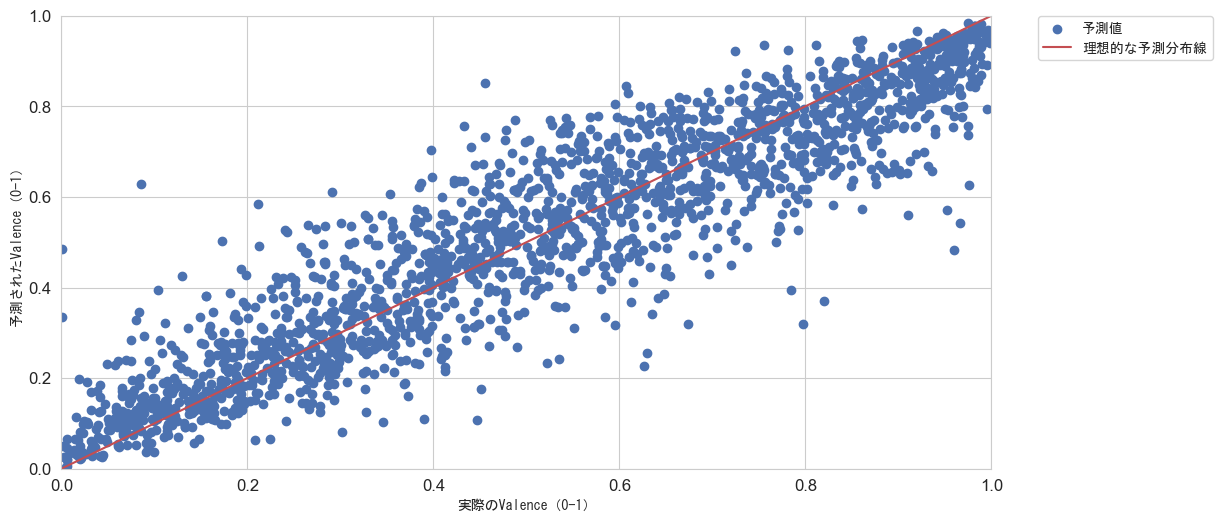

In [215]:
#予測結果をグラフで表示
plt.figure(figsize = (12, 6), dpi = 100)
plt.scatter(y_test, y_pred_rfr, c = "b", label="予測値")#　　　　 散布図で予測価格を表示。
plt.plot([0, 1],[0, 1], c = "r",label="理想的な予測分布線")#     正しく予測できたときにはこの線上にデータ点が集まる。
plt.xlim(0, 1)#                                                  x軸範囲。
plt.ylim(0, 1)#                                                  y軸範囲。
plt.xlabel("実際のValence（0-1）", fontname="MS Gothic")#　　　　  x軸のラベルを設定。
plt.ylabel("予測されたValence（0-1）", fontname="MS Gothic")#　　  y軸のラベルを設定。
plt.legend(bbox_to_anchor = (1.05, 1.0),#                         凡例を設定。plt.legend(bbox_to_anchor=(凡例を置く場所のx座標, y座標))。
           loc = 'upper left',#                                   loc = 凡例のどの角を、先ほど指定した場所(anchor)に置くか。
           borderaxespad = 0,#                                    borderaxespad = anchorとlocの距離。
           prop={"family":"MS Gothic"})#　　　　　　　　　　　　　  prop={"family":フォント名}。
plt.show()#　

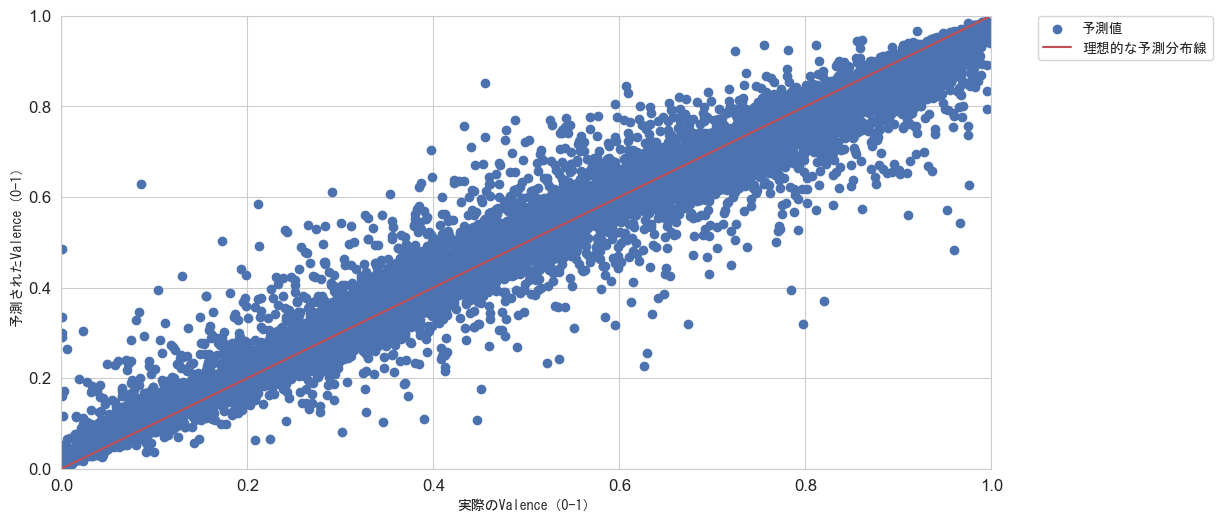

In [216]:
#予測結果をグラフで表示
plt.figure(figsize = (12, 6), dpi = 100)
plt.scatter(y_all, y_pred_rfr_Eall, c = "b", label="予測値")#　　　　 散布図で予測価格を表示。
plt.plot([0, 1],[0, 1], c = "r",label="理想的な予測分布線")#     正しく予測できたときにはこの線上にデータ点が集まる。
plt.xlim(0, 1)#                                                  x軸範囲。
plt.ylim(0, 1)#                                                  y軸範囲。
plt.xlabel("実際のValence（0-1）", fontname="MS Gothic")#　　　　  x軸のラベルを設定。
plt.ylabel("予測されたValence（0-1）", fontname="MS Gothic")#　　  y軸のラベルを設定。
plt.legend(bbox_to_anchor = (1.05, 1.0),#                         凡例を設定。plt.legend(bbox_to_anchor=(凡例を置く場所のx座標, y座標))。
           loc = 'upper left',#                                   loc = 凡例のどの角を、先ほど指定した場所(anchor)に置くか。
           borderaxespad = 0,#                                    borderaxespad = anchorとlocの距離。
           prop={"family":"MS Gothic"})#　　　　　　　　　　　　　  prop={"family":フォント名}。
plt.show()#　

In [151]:
print("決定係数 : " + str(rfr.score(x_test,y_test)))# 決定係数の算出・表示。

決定係数 : 0.8527632998184494


In [217]:
print("決定係数(all) : " + str(rfr.score(x_all,y_all)))# 決定係数の算出・表示。

決定係数(all) : 0.9534857581740773


In [154]:
df_energy = pd.DataFrame(y_test,
                        columns = ["energy"])

In [206]:
df_col=df.drop('energy', axis=1) #valence削除df
x_col = df_col.columns
for i in range(len(x_col)):
    print(x_col[i] + " : " + str(rfr.feature_importances_[i]))#　特徴量名 : 特徴量重要度を表示。

print("")#　一行空ける
print("重要度の合計 : " + str(np.sum(rfr.feature_importances_)))#　特徴量重要度の総和を算出。

danceability : 0.3664242429526976
acousticness : 0.1085271089222475
instrumentalness : 0.08058851711518052
liveness : 0.10787820635911395
loudness : 0.10728971669390036
speechiness : 0.10941651039050615
tempo : 0.1198756975663539

重要度の合計 : 1.0


In [156]:


#########################################################################################################################



In [218]:

df_rfr_E=pd.DataFrame(y_pred_rfr,
                   columns = ["ene_rfr"])

all_rfr_ene = pd.DataFrame(y_pred_rfr_Eall,
                          columns = ["allE_rfr"])


In [223]:
df2 = pd.read_csv(file_name2,index_col = 0)
x_all2 = df2[['danceability', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
y_all2 = df2["valence"]

In [224]:
from sklearn.ensemble import RandomForestRegressor#　 アルゴリズムRandomForestRegressorを使えるようにする。

rfr = RandomForestRegressor(n_jobs= -1)#               アルゴリズムの選択。（n_jobs = -1でCPUの最大コア数-1個使う）
rfr.fit(x_train, y_train)#　　　　　　　　　　　　　　   学習。
y_pred_rfr2 = rfr.predict(x_test)#                      予測。
y_pred_rfr_Vall = rfr.predict(x_all2)

In [161]:
print("決定係数 : " + str(rfr.score(x_test,y_test)))# 決定係数の算出・表示。

決定係数 : 0.4168837032194702


In [ ]:
df_rfr_V=pd.DataFrame(y_pred_rfr2,
                   columns = ["val_rfr"])

df_rfr_Vall=pd.DataFrame(y_pred_rfr_Vall,
                   columns = ["val_rfr"])


In [ ]:
df_valence = pd.DataFrame(y_test,
                        columns = ["valence"])

df_ve=pd.concat([df_valence, df_energy],axis = 1)
df_ve

In [ ]:
df_rfr_E

In [165]:
df_rfr=pd.concat([df_rfr_E, df_rfr_V],axis = 1)
df_rfr

,ene_rfr,val_rfr
0,0.671920,0.507020
1,0.069094,0.510913
2,0.200902,0.459300
3,0.746690,0.361911
4,0.240091,0.618350
...,...,...
1940,0.859280,0.440183
1941,0.633450,0.649090
1942,0.165066,0.312032
1943,0.830880,0.477281


In [169]:
all_data = pd.concat([df_ve.reset_index(drop=True), df_rfr.reset_index(drop=True)], axis=1)
all_data

,valence,energy,ene_rfr,val_rfr
0,0.131,0.7870,0.671920,0.507020
1,0.575,0.0669,0.069094,0.510913
2,0.608,0.3270,0.200902,0.459300
3,0.546,0.6290,0.746690,0.361911
4,0.704,0.0698,0.240091,0.618350
...,...,...,...,...
1940,0.527,0.8840,0.859280,0.440183
1941,0.975,0.7320,0.633450,0.649090
1942,0.405,0.1090,0.165066,0.312032
1943,0.214,0.8290,0.830880,0.477281


<AxesSubplot:xlabel='valence', ylabel='energy'>

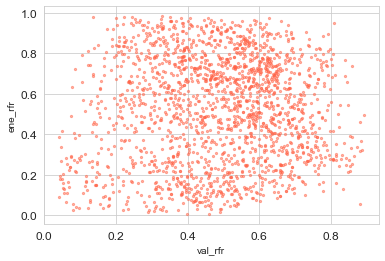

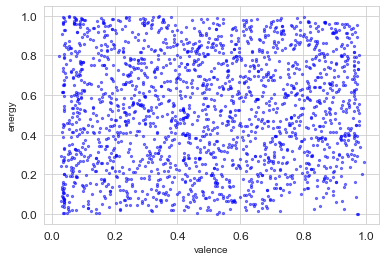

In [178]:
df_rfr.plot.scatter(x='val_rfr', y='ene_rfr',s = 5 , color = "tomato",alpha=0.5)
df_ve.plot.scatter(x='valence', y='energy',s = 5 , color = "blue",alpha=0.5)

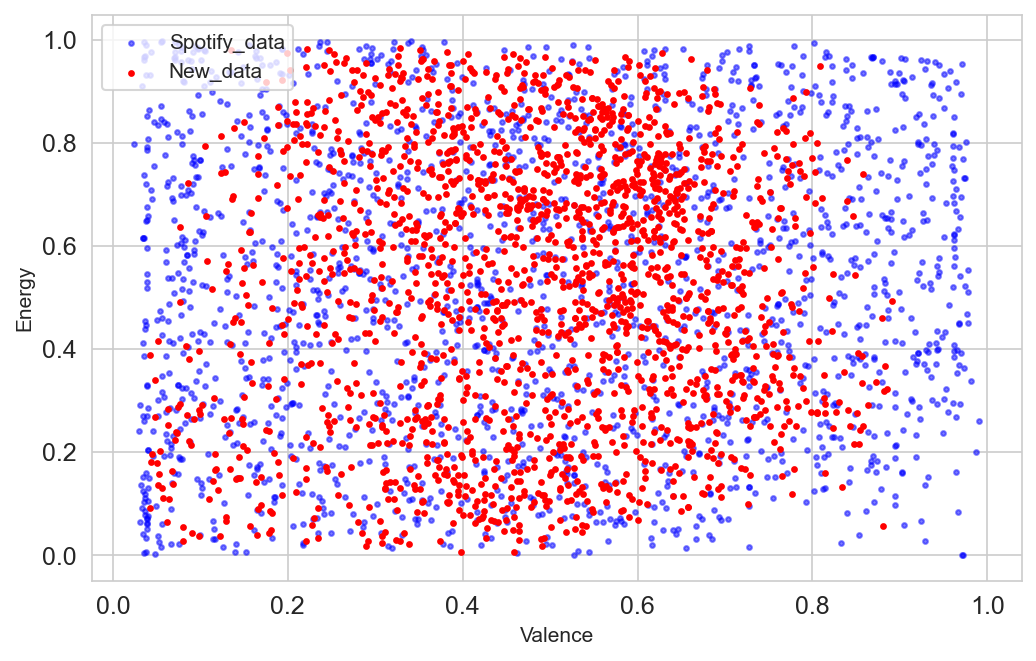

In [205]:
#グラフを重ねて表示
plt.figure(figsize=(8,5),dpi=150)
plt.scatter(x=df_ve['valence'], y=df_ve['energy'],s = 5 ,label='Spotify_data', color = "blue",alpha=0.5)
plt.scatter(x=df_rfr['val_rfr'], y=df_rfr['ene_rfr'],s = 5 , label='New_data',color = "red",alpha=1)

plt.xlabel('Valence')

plt.ylabel("Energy")

plt.legend(loc="upper left", fontsize=10)

In [207]:
df2

,danceability,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.7420,0.00756,0.000002,0.1240,-5.819,0.3690,125.044,0.6040
1,0.0925,0.99200,0.762000,0.3330,-26.473,0.0439,87.431,0.0357
2,0.1710,0.90400,0.957000,0.0910,-22.603,0.0397,75.733,0.0350
3,0.1620,0.99000,0.804000,0.0826,-29.768,0.0470,131.477,0.0340
4,0.3340,0.97400,0.878000,0.1090,-24.384,0.0407,119.510,0.0584
...,...,...,...,...,...,...,...,...
9716,0.5040,0.35800,0.000104,0.4000,-5.170,0.0482,167.852,0.9650
9717,0.5760,0.09580,0.125000,0.3620,-6.494,0.0710,119.400,0.9010
9718,0.5390,0.12000,0.000092,0.1190,-4.388,0.0805,112.831,0.9330
9719,0.6710,0.02660,0.000209,0.0951,-3.868,0.0564,163.945,0.9460
